## Data Exploration and Feature Engineering

### Import necessary Libraries and Packages

In [1]:
# Importing required libraries and packages
import pandas as pd # data science essentials
import matplotlib.pyplot as plt # essential graphical output
import seaborn as sns # enhanced graphical output
from sklearn.model_selection import train_test_split # train test split
import statsmodels.formula.api as smf # predictive modeling with nice output
from sklearn.linear_model import LinearRegression
import numpy as np # mathematical essentials
import sklearn as sk 
from sklearn.neighbors import KNeighborsRegressor # KNN for Regression
from sklearn.preprocessing import StandardScaler # standard scaler

### Loading the dataset

In [2]:
#Read birthweight_low excel file

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# specifying file name
file = './birthweight_low.xlsx'


# reading the file into Python
birthweight = pd.read_excel(file)


# outputting the first ten rows of the dataset
birthweight.head(n=10)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
0,69,NaN,5,2.0,62,NaN,4,7,23,9,1,0,1,0,0,1,0,697
1,68,12.0,3,10.0,61,11.0,4,6,25,11,1,1,0,0,1,0,0,1290
2,71,12.0,3,6.0,46,12.0,2,7,21,12,1,0,1,0,0,1,0,1490
3,59,16.0,1,8.0,48,16.0,7,8,21,10,0,0,0,1,0,0,1,1720
4,48,12.0,4,6.0,39,12.0,2,9,17,13,0,1,0,0,1,0,0,1956
5,67,11.0,4,8.0,40,8.0,4,9,16,14,0,1,0,0,1,0,0,1984
6,54,12.0,2,12.0,46,12.0,9,9,17,12,1,0,1,0,0,1,0,2050
7,71,14.0,4,7.0,51,11.0,9,8,15,13,0,1,0,0,1,0,0,2068
8,56,12.0,1,9.0,53,14.0,8,9,14,9,1,1,0,0,1,0,0,2148
9,58,12.0,2,12.0,61,16.0,9,9,13,6,0,0,1,0,0,1,0,2180


### Analysing the dataset

In [3]:
# Using .shape to view (ROWS, COLUMNS)
birthweight.shape

(196, 18)

In [4]:
# Formatting and printing the dimensions of the dataset
print(f"""
Size of Original Dataset
------------------------
Observations: {birthweight.shape[0]}
Features:     {birthweight.shape[1]}
""")


Size of Original Dataset
------------------------
Observations: 196
Features:     18



In [5]:
# looping to print column names one by one
for column in birthweight:
    print(column)

mage
meduc
monpre
npvis
fage
feduc
omaps
fmaps
cigs
drink
male
mwhte
mblck
moth
fwhte
fblck
foth
bwght


In [6]:
# Displaying the LAST 5 rows of the DataFrame
birthweight.tail(n=5)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
191,30,12.0,5,12.0,38,NaN,5,7,3,2,1,0,1,0,0,0,1,4610
192,41,14.0,2,12.0,47,16.0,8,9,10,4,1,0,1,0,0,1,0,4660
193,33,15.0,2,15.0,38,13.0,8,8,0,1,0,1,0,0,1,0,0,4678
194,31,17.0,2,6.0,43,14.0,9,10,8,4,1,0,1,0,0,1,0,4791
195,39,17.0,2,10.0,38,12.0,8,9,0,0,0,0,0,1,1,0,0,4933


### Identifying missing values

In [7]:
# Check for null values
birthweight.isnull().values.any()

True

In [8]:
# Check null value count
birthweight.isnull().sum()

mage      0
meduc     3
monpre    0
npvis     3
fage      0
feduc     7
omaps     0
fmaps     0
cigs      0
drink     0
male      0
mwhte     0
mblck     0
moth      0
fwhte     0
fblck     0
foth      0
bwght     0
dtype: int64

In [9]:
# INFOrmation about each variable
birthweight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mage    196 non-null    int64  
 1   meduc   193 non-null    float64
 2   monpre  196 non-null    int64  
 3   npvis   193 non-null    float64
 4   fage    196 non-null    int64  
 5   feduc   189 non-null    float64
 6   omaps   196 non-null    int64  
 7   fmaps   196 non-null    int64  
 8   cigs    196 non-null    int64  
 9   drink   196 non-null    int64  
 10  male    196 non-null    int64  
 11  mwhte   196 non-null    int64  
 12  mblck   196 non-null    int64  
 13  moth    196 non-null    int64  
 14  fwhte   196 non-null    int64  
 15  fblck   196 non-null    int64  
 16  foth    196 non-null    int64  
 17  bwght   196 non-null    int64  
dtypes: float64(3), int64(15)
memory usage: 27.7 KB


In [10]:
# Fill missing values with mean
for col in birthweight.columns:
    if birthweight[col].isnull().sum() != 0 :
        birthweight[col].fillna(value = birthweight[col].mean(), inplace=True)

In [11]:
# Recheck null value count
birthweight.isnull().sum()

mage      0
meduc     0
monpre    0
npvis     0
fage      0
feduc     0
omaps     0
fmaps     0
cigs      0
drink     0
male      0
mwhte     0
mblck     0
moth      0
fwhte     0
fblck     0
foth      0
bwght     0
dtype: int64

### Correlation

In [12]:
# Correlation
birthweight_corr = birthweight.corr(method = 'pearson')
birthweight_corr.loc[ : , "bwght"].round(decimals = 2).sort_values(ascending = False,)

bwght     1.00
omaps     0.25
fmaps     0.25
feduc     0.13
mblck     0.13
fblck     0.12
male      0.11
meduc     0.09
npvis     0.06
moth     -0.02
fwhte    -0.04
monpre   -0.05
foth     -0.08
mwhte    -0.11
fage     -0.40
mage     -0.46
cigs     -0.57
drink    -0.74
Name: bwght, dtype: float64

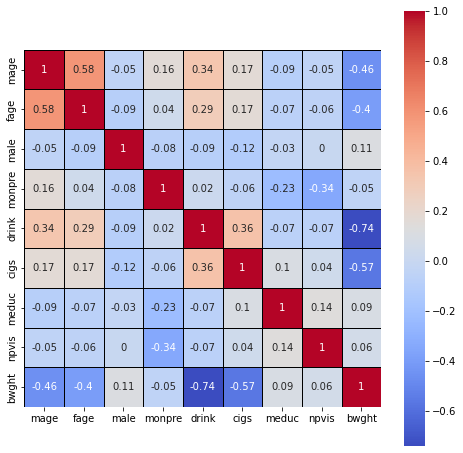

In [13]:
# Identifying the correction between all variables

# specifying plot size (making it bigger)
fig, ax = plt.subplots(figsize=(8,8))

# limiting the size of the correlation matrixt
birthweight_subset = birthweight.loc[ : , ['mage',
                                           'fage',
                                           'male',
                                           'monpre',
                                           'drink',
                                           'cigs',
                                           'meduc',
                                           'npvis',
                                           'bwght']]

# UNSCALED correlation matrix
birthweight_corr = birthweight_subset.corr().round(2)

# instantiating a heatmap
sns.heatmap(data       = birthweight_corr, # the correlation matrix
            cmap       = 'coolwarm',     # cool warm colors
            square     = True,          # tightening the layout
            annot      = True,          # should there be numbers in the heatmap           
            linecolor  = 'black',       # lines between boxes
            linewidths = 0.9)          # how thick should the lines be?


# displaying the plot
plt.show()


In [14]:
"""CONTINUOUS
----------
mage
fage
bwght
omaps
fmaps
meduc
feduc

INTERVAL/COUNT
--------------
monpre
npvis
cigs
drink

CATEGORICAL/OTHER
-----------------
male
mwhte
mblck
moth
fwhte
fblck
foth"""

'CONTINUOUS\n----------\nmage\nfage\nbwght\nomaps\nfmaps\nmeduc\nfeduc\n\nINTERVAL/COUNT\n--------------\nmonpre\nnpvis\ncigs\ndrink\n\nCATEGORICAL/OTHER\n-----------------\nmale\nmwhte\nmblck\nmoth\nfwhte\nfblck\nfoth'

In [15]:
# creating a list of continuous features (including Sale_Price)
continuous_data = ['mage', 'fage', 'bwght', 'omaps', 'fmaps','feduc','meduc']


# developing a correlation matrix based on continuous features
birthweight_corr = birthweight[continuous_data].corr(method = 'pearson')


# filtering the results to only show correlations with Sale_Price
birthweight_corr.loc[ : , 'bwght'].round(decimals = 2).sort_values(ascending = False)

bwght    1.00
omaps    0.25
fmaps    0.25
feduc    0.13
meduc    0.09
fage    -0.40
mage    -0.46
Name: bwght, dtype: float64

In [16]:
birthweight.describe(include = [int, float]).round(2)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
count,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00
mean,40.15,13.91,2.34,11.60,39.29,13.85,8.19,8.96,10.93,5.40,0.55,0.27,0.38,0.35,0.35,0.34,0.31,3334.09
std,10.25,2.04,1.36,4.23,8.98,2.59,1.58,0.65,6.10,3.00,0.50,0.45,0.49,0.48,0.48,0.48,0.46,646.70
min,23.00,8.00,1.00,2.00,23.00,1.00,2.00,5.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,697.00
25%,33.00,12.00,2.00,10.00,34.75,12.00,8.00,9.00,6.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2916.25
50%,39.00,14.00,2.00,12.00,38.00,14.00,9.00,9.00,11.00,5.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,3452.00
75%,46.00,16.00,3.00,12.00,43.00,16.00,9.00,9.00,15.25,7.25,1.00,1.00,1.00,1.00,1.00,1.00,1.00,3759.50
max,71.00,17.00,8.00,35.00,73.00,17.00,10.00,10.00,25.00,14.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,4933.00


### Histogram to identify skewness in the data

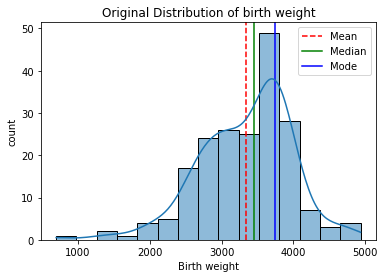

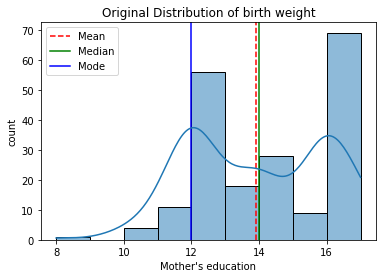

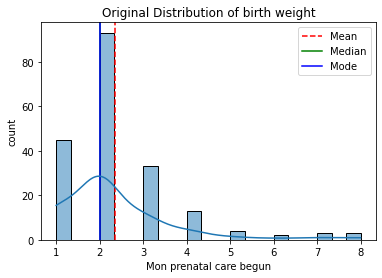

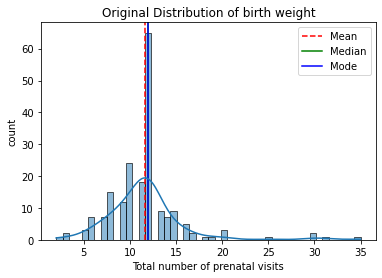

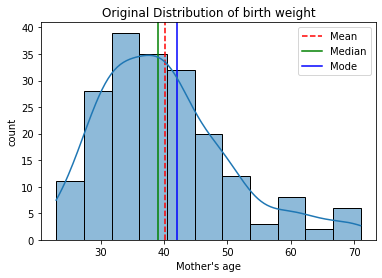

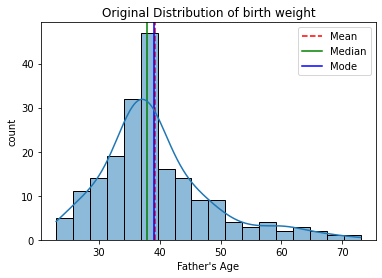

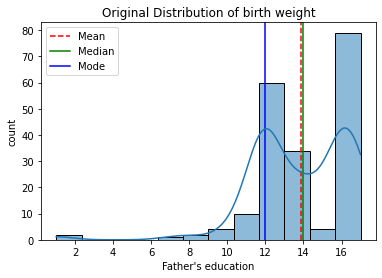

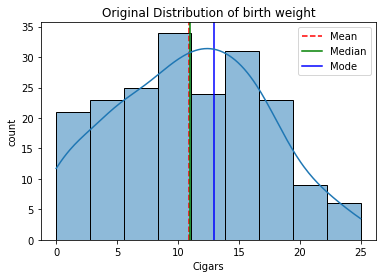

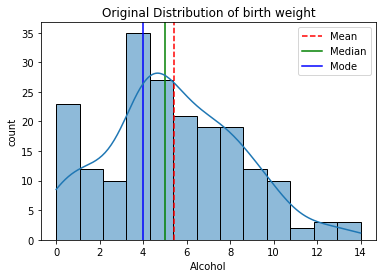

In [17]:
# developing a histogram using HISTPLOT
# histogram for bwght

# To show mean , median and mode in graph
# https://stackoverflow.com/questions/51417483/mean-median-mode-lines-showing-only-in-last-graph-in-seaborn/51417635
    mean = birthweight['bwght'].mean()
    median = birthweight['bwght'].median()
    mode = birthweight['bwght'].mode()[0]

    plt.axvline(mean, color='r', linestyle='--')
    plt.axvline(median, color='g', linestyle='-')
    plt.axvline(mode, color='b', linestyle='-')
    plt.legend({'Mean':mean,'Median':median,'Mode':mode})

    sns.histplot(data  = birthweight,
             x     = 'bwght',
            kde    = True)


    # title and axis labels
                plt.title(label   = "Original Distribution of birth weight")
    plt.xlabel(xlabel = "Birth weight") # avoiding using dataset labels
    plt.ylabel(ylabel = "count")

    # displaying the histogram
    plt.show()

#-----------------------------------------------------------------------------
mean = birthweight['meduc'].mean()
median = birthweight['meduc'].median()
mode = birthweight['meduc'].mode()[0]

plt.axvline(mean, color='r', linestyle='--')
plt.axvline(median, color='g', linestyle='-')
plt.axvline(mode, color='b', linestyle='-')
plt.legend({'Mean':mean,'Median':median,'Mode':mode})

# histogram for meduc 
sns.histplot(data   = birthweight,
             x      = 'meduc',
             kde    = True)


# title and axis labels
plt.title(label   = "Original Distribution of birth weight")
plt.xlabel(xlabel = "Mother's education") # avoiding using dataset labels
plt.ylabel(ylabel = "count")

# rendering the plot
plt.show()

#-----------------------------------------------------------------------------
mean = birthweight['monpre'].mean()
median = birthweight['monpre'].median()
mode = birthweight['monpre'].mode()[0]

plt.axvline(mean, color='r', linestyle='--')
plt.axvline(median, color='g', linestyle='-')
plt.axvline(mode, color='b', linestyle='-')
plt.legend({'Mean':mean,'Median':median,'Mode':mode})

# histogram for monpre
sns.histplot(data   = birthweight,
             x      = 'monpre',
             kde    = True)

# title and axis labels
plt.title(label   = "Original Distribution of birth weight")
plt.xlabel(xlabel = "Mon prenatal care begun") # avoiding using dataset labels
plt.ylabel(ylabel = "count")

# rendering the plot
plt.show()

#-----------------------------------------------------------------------------
mean = birthweight['npvis'].mean()
median = birthweight['npvis'].median()
mode = birthweight['npvis'].mode()[0]

plt.axvline(mean, color='r', linestyle='--')
plt.axvline(median, color='g', linestyle='-')
plt.axvline(mode, color='b', linestyle='-')
plt.legend({'Mean':mean,'Median':median,'Mode':mode})

# histogram for monpre
sns.histplot(data   = birthweight,
             x      = 'npvis',
             kde    = True)

# title and axis labels
plt.title(label   = "Original Distribution of birth weight")
plt.xlabel(xlabel = "Total number of prenatal visits") # avoiding using dataset labels
plt.ylabel(ylabel = "count")

# rendering the plot
plt.show()

#-----------------------------------------------------------------------------
mean = birthweight['mage'].mean()
median = birthweight['mage'].median()
mode = birthweight['mage'].mode()[0]

plt.axvline(mean, color='r', linestyle='--')
plt.axvline(median, color='g', linestyle='-')
plt.axvline(mode, color='b', linestyle='-')
plt.legend({'Mean':mean,'Median':median,'Mode':mode})

# histogram for mage
sns.histplot(data   = birthweight,
             x      = 'mage',
             kde    = True)

# title and axis labels
plt.title(label   = "Original Distribution of birth weight")
plt.xlabel(xlabel = "Mother's age") # avoiding using dataset labels
plt.ylabel(ylabel = "count")

# rendering the plot
plt.show()

#-----------------------------------------------------------------------------
mean = birthweight['fage'].mean()
median = birthweight['fage'].median()
mode = birthweight['fage'].mode()[0]

plt.axvline(mean, color='r', linestyle='--')
plt.axvline(median, color='g', linestyle='-')
plt.axvline(mode, color='b', linestyle='-')
plt.legend({'Mean':mean,'Median':median,'Mode':mode})

# histogram for fage
sns.histplot(data   = birthweight,
             x      = 'fage',
             kde    = True)

# title and axis labels
plt.title(label   = "Original Distribution of birth weight")
plt.xlabel(xlabel = "Father's Age") # avoiding using dataset labels
plt.ylabel(ylabel = "count")

# rendering the plot
plt.show()

#-----------------------------------------------------------------------------
mean = birthweight['feduc'].mean()
median = birthweight['feduc'].median()
mode = birthweight['feduc'].mode()[0]

plt.axvline(mean, color='r', linestyle='--')
plt.axvline(median, color='g', linestyle='-')
plt.axvline(mode, color='b', linestyle='-')
plt.legend({'Mean':mean,'Median':median,'Mode':mode})

# histogram for feduc
sns.histplot(data   = birthweight,
             x      = 'feduc',
             kde    = True)

# title and axis labels
plt.title(label   = "Original Distribution of birth weight")
plt.xlabel(xlabel = "Father's education") # avoiding using dataset labels
plt.ylabel(ylabel = "count")

# rendering the plot
plt.show()

#-----------------------------------------------------------------------------
mean = birthweight['cigs'].mean()
median = birthweight['cigs'].median()
mode = birthweight['cigs'].mode()[0]

plt.axvline(mean, color='r', linestyle='--')
plt.axvline(median, color='g', linestyle='-')
plt.axvline(mode, color='b', linestyle='-')
plt.legend({'Mean':mean,'Median':median,'Mode':mode})

# histogram for cigs
sns.histplot(data   = birthweight,
             x      = 'cigs',
             kde    = True)

# title and axis labels
plt.title(label   = "Original Distribution of birth weight")
plt.xlabel(xlabel = "Cigars") # avoiding using dataset labels
plt.ylabel(ylabel = "count")

# rendering the plot
plt.show()

#-----------------------------------------------------------------------------
mean = birthweight['drink'].mean()
median = birthweight['drink'].median()
mode = birthweight['drink'].mode()[0]

plt.axvline(mean, color='r', linestyle='--')
plt.axvline(median, color='g', linestyle='-')
plt.axvline(mode, color='b', linestyle='-')
plt.legend({'Mean':mean,'Median':median,'Mode':mode})

# histogram for drink
sns.histplot(data   = birthweight,
             x      = 'drink',
             kde    = True)

# title and axis labels
plt.title(label   = "Original Distribution of birth weight")
plt.xlabel(xlabel = "Alcohol") # avoiding using dataset labels
plt.ylabel(ylabel = "count")

# rendering the plot
plt.show()


### Applying Log to skewed variables

In [18]:
birthweight['log_npvis'] = np.log(birthweight['npvis'])

In [19]:
birthweight['log_meduc'] = np.log(birthweight['meduc'])

In [20]:
birthweight['log_mage'] = np.log(birthweight['mage'])

In [21]:
birthweight['log_cigs'] = np.log(birthweight['cigs'] + 0.001)

In [22]:
birthweight['log_drink'] = np.log(birthweight['drink'] + 0.001)

In [23]:
birthweight['log_monpre'] = np.log(birthweight['monpre'])

In [24]:
birthweight['log_feduc'] = np.log(birthweight['feduc'])

In [25]:
birthweight['log_bwght'] = np.log(birthweight['bwght'])

### Interactions

In [26]:
birthweight['interaction_fage_mage'] = birthweight['fage'] * birthweight['log_mage']

In [27]:
birthweight['smoking_weekly'] = birthweight['log_cigs'] * 7

In [28]:
birthweight['interaction_cigs_drink'] = birthweight['smoking_weekly'] * birthweight['drink']

In [29]:
birthweight['interaction_meduc_feduc'] = birthweight['meduc'] * birthweight['feduc']

In [30]:
birthweight['interaction_cigs_mage'] = birthweight['log_mage'] * birthweight['cigs']

In [31]:
birthweight['interaction_drink_mage'] = birthweight['log_mage'] * birthweight['drink']

In [32]:
birthweight.columns

Index(['mage', 'meduc', 'monpre', 'npvis', 'fage', 'feduc', 'omaps', 'fmaps', 'cigs', 'drink', 'male', 'mwhte', 'mblck', 'moth', 'fwhte', 'fblck', 'foth', 'bwght', 'log_npvis', 'log_meduc', 'log_mage', 'log_cigs', 'log_drink', 'log_monpre', 'log_feduc', 'log_bwght', 'interaction_fage_mage', 'smoking_weekly', 'interaction_cigs_drink', 'interaction_meduc_feduc', 'interaction_cigs_mage', 'interaction_drink_mage'], dtype='object')

### Further categorizing the data

In [33]:
birthweight['m_mage'] = birthweight['mage'].apply(lambda x: 1 if x >= 35 else 0)
   

In [34]:
birthweight['m_fage'] = birthweight['fage'].apply(lambda x: 1 if x >= 35 else 0)

In [35]:
birthweight['m_meduc'] = birthweight['meduc'].apply(lambda x: 1 if x < 10 else 0)
 

In [36]:
birthweight['m_cigs'] = birthweight['cigs'].apply(lambda x: 1 if x >= 2 else 0)


In [37]:
# As per https://www.webmd.com/baby/how-often-do-i-need-prenatal-visits#1-2. A total of 14 visits is recommended, so i have considered 7 as the threshold.
birthweight['m_npvis'] = birthweight['npvis'].apply(lambda x: 1 if x < 7 else 0)


In [38]:
birthweight['m_monpre'] = birthweight['monpre'].apply(lambda x: 1 if x > 4 else 0)

## Prepare for Model Development

### Assigning Explanatory and Response variables

In [39]:
# Explanatory variables
# Dropping variables with high p-value and variables that does not explain target variable
x = birthweight.drop(['bwght','log_bwght','log_cigs','m_fage','mwhte','m_cigs','m_meduc','log_mage','m_monpre','monpre','meduc', 'npvis','fwhte','feduc','log_feduc','log_monpre','interaction_cigs_mage','log_drink','male','mage','fblck','log_meduc','interaction_cigs_drink','interaction_drink_mage','mblck','foth','moth','omaps','fmaps','smoking_weekly','log_npvis','interaction_meduc_feduc'], axis=1)

# Response variable
y = birthweight['bwght']

x.columns

Index(['fage', 'cigs', 'drink', 'interaction_fage_mage', 'm_mage', 'm_npvis'], dtype='object')

### Train Test Split

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 219)

## Model Development in statsmodels

### Ordinary Least Squares Regression

In [41]:
# declaring set of x-variables
x_variables = ['m_mage','fage','cigs','drink','interaction_fage_mage']

# looping to make x-variables suitable for statsmodels
for val in x_variables:
    print(f"{val} +")

m_mage +
fage +
cigs +
drink +
interaction_fage_mage +


In [42]:
birthweight_train = pd.concat([x_train, y_train], axis = 1)

# Step 1: INSTANTIATE a model object
lm_best = smf.ols(formula = """bwght ~  m_mage +
                                        fage +
                                        cigs +
                                        drink +
                                        m_npvis +
                                        interaction_fage_mage 
                                       """,                  
                  data = birthweight_train)

# Step 2: FIT the data into the model object
results = lm_best.fit()


# Step 3: analyze the SUMMARY output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     68.47
Date:                Thu, 02 Dec 2021   Prob (F-statistic):           3.28e-39
Time:                        22:51:09   Log-Likelihood:                -1064.0
No. Observations:                 147   AIC:                             2142.
Df Residuals:                     140   BIC:                             2163.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              4086.57

## Develop Candidate Models

### Linear Regression

In [43]:
#Linear Regression
lr = LinearRegression()


# Fitting the model
lr_fit = lr.fit(x_train, y_train)


# Predictions
lr_pred = lr_fit.predict(x_test)

# SCORING the results
print('OLS Training Score :', lr.score(x_train, y_train).round(4))
print('OLS Testing Score  :', lr.score(x_test, y_test).round(4))


# saving scoring data for future use
lr_train_score = lr.score(x_train, y_train).round(4) # using R-square
lr_test_score  = lr.score(x_test, y_test).round(4)   # using R-square


# displaying and saving the gap between training and testing
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)

OLS Training Score : 0.7458
OLS Testing Score  : 0.6482
OLS Train-Test Gap : 0.0976


In [44]:
# zipping each feature name to its coefficient
lr_model_values = zip(x.columns,
                      lr_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lr_model_lst = [('intercept', lr_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lr_model_values:
    lr_model_lst.append(val)
    

# checking the results
for pair in lr_model_lst:
    print(pair)

('intercept', 4086.57)
('fage', 97.95)
('cigs', -39.07)
('drink', -102.95)
('interaction_fage_mage', -25.89)
('m_mage', 268.5)
('m_npvis', -263.3)


### Lasso Regression

In [45]:
# INSTANTIATING a model object
lasso_model = sk.linear_model.Lasso(alpha     = 1.0,  # default shrinkage
                                    normalize = True) # default magitude


# FITTING to the training data
lasso_fit = lasso_model.fit(x_train, y_train)


# PREDICTING on new data
lasso_pred = lasso_fit.predict(x_test)


# SCORING the results
print('Lasso Training Score :', lasso_model.score(x_train, y_train).round(4))
print('Lasso Testing Score  :', lasso_model.score(x_test, y_test).round(4))


## the following code has been provided for you ##

# saving scoring data for future use
lasso_train_score = lasso_model.score(x_train, y_train).round(4) # using R-square
lasso_test_score  = lasso_model.score(x_test, y_test).round(4)   # using R-square


# displaying and saving the gap between training and testing
print('Lasso Train-Test Gap :', abs(lasso_train_score - lasso_test_score).round(4))
lasso_test_gap = abs(lasso_train_score - lasso_test_score).round(4)

Lasso Training Score : 0.7015
Lasso Testing Score  : 0.688
Lasso Train-Test Gap : 0.0135


In [46]:
# zipping each feature name to its coefficient
lasso_model_values = zip(x.columns, lasso_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lasso_model_lst = [('intercept', lasso_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lasso_model_values:
    lasso_model_lst.append(val)
    

# checking the results
for pair in lasso_model_lst:
    print(pair)

('intercept', 4835.74)
('fage', 0.0)
('cigs', -35.47)
('drink', -112.18)
('interaction_fage_mage', -3.29)
('m_mage', -0.0)
('m_npvis', -244.98)


### ARD Regression Model

In [47]:

# INSTANTIATING a model object
ard_model = sk.linear_model.ARDRegression(normalize  = False)


# FITTING the training data
ard_fit = ard_model.fit(x_train, y_train)


# PREDICTING on new data
ard_pred = ard_fit.predict(x_test)


print('Training Score:', ard_model.score(x_train, y_train).round(4))
print('Testing Score :', ard_model.score(x_test, y_test).round(4))


# saving scoring data for future use
ard_train_score = ard_model.score(x_train, y_train).round(4)
ard_test_score  = ard_model.score(x_test, y_test).round(4)


# displaying and saving the gap between training and testing
print('ARD Train-Test Gap :', abs(ard_train_score - ard_test_score).round(4))
ard_test_gap = abs(ard_train_score - ard_test_score).round(4)

Training Score: 0.7447
Testing Score : 0.6602
ARD Train-Test Gap : 0.0845


In [48]:
# zipping each feature name to its coefficient
ard_model_values = zip(x.columns, ard_fit.coef_.round(decimals = 5))


# setting up a placeholder list to store model features
ard_model_lst = [('intercept', ard_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in ard_model_values:
    ard_model_lst.append(val)
    

# checking the results
for pair in ard_model_lst:
    print(pair)

('intercept', 4183.55)
('fage', 85.92317)
('cigs', -38.33251)
('drink', -103.90317)
('interaction_fage_mage', -23.11374)
('m_mage', 218.01268)
('m_npvis', -217.60072)


In [49]:
## This code may have to be run more than once ##

# dropping coefficients that are equal to zero

# printing out each feature-coefficient pair one by one
for feature, coefficient in ard_model_lst:
        
        if coefficient == 0:
            ard_model_lst.remove((feature, coefficient))

            
# checking the results
for pair in ard_model_lst:
    print(pair)

('intercept', 4183.55)
('fage', 85.92317)
('cigs', -38.33251)
('drink', -103.90317)
('interaction_fage_mage', -23.11374)
('m_mage', 218.01268)
('m_npvis', -217.60072)


### k-Nearest Neighbors with Non-Standardized Data

In [50]:
# INSTANTIATING a KNN model object
knn_reg = KNeighborsRegressor(algorithm = 'auto',
                              n_neighbors = 1)


# FITTING to the training data
knn_fit = knn_reg.fit(x_train, y_train)


# PREDICTING on new data
knn_reg_pred = knn_fit.predict(x_test)


# SCORING the results
print('KNN Training Score:', knn_reg.score(x_train, y_train).round(4))
print('KNN Testing Score :', knn_reg.score(x_test, y_test).round(4))


# saving scoring data for future use
knn_reg_score_train = knn_reg.score(x_train, y_train).round(4)
knn_reg_score_test  = knn_reg.score(x_test, y_test).round(4)


# displaying and saving the gap between training and testing
print('KNN Train-Test Gap:', abs(knn_reg_score_train - knn_reg_score_test).round(4))
knn_reg_test_gap = abs(knn_reg_score_train - knn_reg_score_test).round(4)

KNN Training Score: 1.0
KNN Testing Score : 0.2965
KNN Train-Test Gap: 0.7035


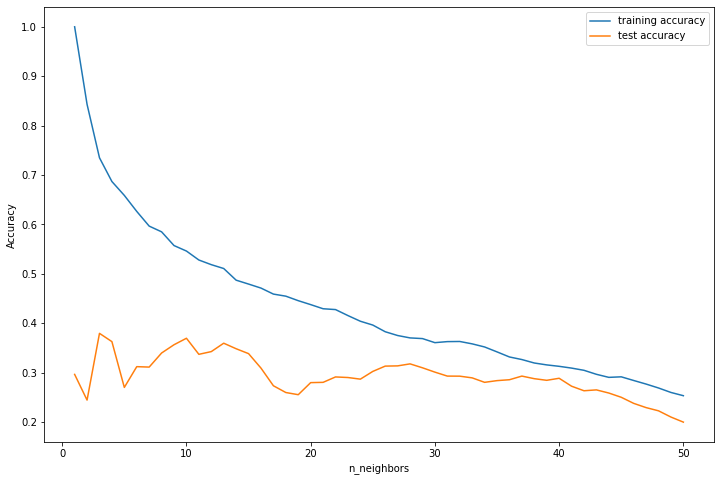

In [51]:
# creating lists for training set accuracy and test set accuracy
training_accuracy = []
test_accuracy     = []


# building a visualization of 1 to 50 neighbors
neighbors_settings = range(1, 51)


for n_neighbors in neighbors_settings:
    # Building the model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(x_train, y_train)
    
    # Recording the training set accuracy
    training_accuracy.append(clf.score(x_train, y_train))
    
    # Recording the generalization accuracy
    test_accuracy.append(clf.score(x_test, y_test))


# plotting the visualization
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

In [52]:
# finding the optimal number of neighbors
opt_neighbors = test_accuracy.index(max(test_accuracy)) + 1
print(f"""The optimal number of neighbors is {opt_neighbors}""")

The optimal number of neighbors is 3


In [53]:
# INSTANTIATING a model with the optimal number of neighbors
knn_opt = KNeighborsRegressor(algorithm   = 'auto',
                              n_neighbors = opt_neighbors)



# FITTING the model based on the training data
knn_opt_fit = knn_opt.fit(x_train, y_train)



# PREDITCING on new data
knn_opt_pred = knn_opt_fit.predict(x_test)



# SCORING the results
print('KNN Training Score:', knn_opt.score(x_train, y_train).round(4))
print('KNN Testing Score :', knn_opt.score(x_test, y_test).round(4))


# saving scoring data for future use
knn_opt_score_train = knn_opt.score(x_train, y_train).round(4)
knn_opt_score_test  = knn_opt.score(x_test, y_test).round(4)


# displaying and saving the gap between training and testing
print('KNN Train-Test Gap:', abs(knn_opt_score_train - knn_opt_score_test).round(4))
knn_opt_test_gap = abs(knn_opt_score_train - knn_opt_score_test).round(4)

KNN Training Score: 0.7349
KNN Testing Score : 0.3796
KNN Train-Test Gap: 0.3553


### k-Nearest Neighbors with Standardized Data

In [54]:
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(x)


# TRANSFORMING our data after fit
x_scaled = scaler.transform(x)


# converting scaled data into a DataFrame
x_scaled_df = pd.DataFrame(x_scaled)


# checking the results
x_scaled_df.describe().round(2)

,0,1,2,3,4,5
count,196.00,196.00,196.00,196.00,196.00,196.00
mean,0.00,-0.00,-0.00,0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.82,-1.80,-1.80,-1.65,-1.37,-0.27
25%,-0.51,-0.81,-0.47,-0.63,-1.37,-0.27
50%,-0.14,0.01,-0.13,-0.23,0.73,-0.27
75%,0.41,0.71,0.62,0.23,0.73,-0.27
max,3.76,2.31,2.87,3.82,0.73,3.75


In [55]:
# adding labels to the scaled DataFrame
x_scaled_df.columns = x.columns

#  Checking pre- and post-scaling of the data
print(f"""
Dataset BEFORE Scaling
----------------------
{np.var(x)}


Dataset AFTER Scaling
----------------------
{np.var(x_scaled_df)}
""")


Dataset BEFORE Scaling
----------------------
fage                       80.277671
cigs                       37.035714
drink                       8.964077
interaction_fage_mage    1650.226737
m_mage                      0.226572
m_npvis                     0.061927
dtype: float64


Dataset AFTER Scaling
----------------------
fage                     1.0
cigs                     1.0
drink                    1.0
interaction_fage_mage    1.0
m_mage                   1.0
m_npvis                  1.0
dtype: float64



In [56]:
# this is the exact code we were using before
x_train_STAND, x_test_STAND, y_train_STAND, y_test_STAND = train_test_split(
                                                           x_scaled_df,
                                                           y,
                                                           test_size = 0.25,
                                                           random_state = 219)

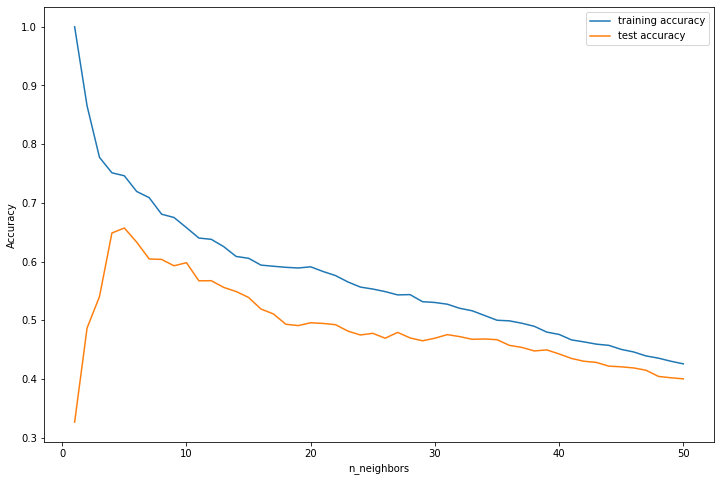

The optimal number of neighbors is 5


In [57]:
# creating lists for training set accuracy and test set accuracy
training_accuracy = []
test_accuracy = []


# building a visualization of 1 to 50 neighbors
neighbors_settings = range(1, 51)


for n_neighbors in neighbors_settings:
    # Building the model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(x_train_STAND, y_train_STAND)
    
    # Recording the training set accuracy
    training_accuracy.append(clf.score(x_train_STAND, y_train_STAND))
    
    # Recording the generalization accuracy
    test_accuracy.append(clf.score(x_test_STAND, y_test_STAND))


# plotting the visualization
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy,     label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()


# finding the optimal number of neighbors
opt_neighbors = test_accuracy.index(max(test_accuracy)) + 1
print(f"""The optimal number of neighbors is {opt_neighbors}""")

In [58]:
# INSTANTIATING a model with the optimal number of neighbors
knn_stand = KNeighborsRegressor(algorithm = 'auto',
                                n_neighbors = opt_neighbors)



# FITTING the model based on the training data
knn_stand_fit = knn_stand.fit(x_train_STAND, y_train_STAND)



# PREDITCING on new data
knn_stand_pred = knn_stand_fit.predict(x_test_STAND)



# SCORING the results
print('KNN Training Score:', knn_stand.score(x_train_STAND, y_train_STAND).round(4))
print('KNN Testing Score :', knn_stand.score(x_test_STAND, y_test_STAND).round(4))


# saving scoring data for future use
knn_stand_score_train = knn_stand.score(x_train_STAND, y_train_STAND).round(4)
knn_stand_score_test  = knn_stand.score(x_test_STAND, y_test_STAND).round(4)


# displaying and saving the gap between training and testing
print('KNN Train-Test Gap:', abs(knn_stand_score_train - knn_stand_score_test).round(4))
knn_stand_test_gap = abs(knn_stand_score_train - knn_stand_score_test).round(4)

KNN Training Score: 0.7462
KNN Testing Score : 0.6572
KNN Train-Test Gap: 0.089


## Model Performance

### Comparing the performance across different model and write to excel file 

In [59]:
# comparing results

print(f"""
Model                 Train Score      Test Score          Test Gap
-----                 -----------      ----------          --------
OLS                   {lr_train_score}             {lr_test_score}              {lr_test_gap}
Lasso(Final Model)    {lasso_train_score}           {lasso_test_score}              {lasso_test_gap}
ARD                   {ard_train_score}           {ard_test_score}              {ard_test_gap}
""")


# creating a dictionary for model results
model_performance = {
    
    'Model Type'    : ['OLS', 'Lasso', 'ARD'],
           
    'Training' : [lr_train_score, lasso_train_score,
                                   ard_train_score],
           
    'Testing'  : [lr_test_score, lasso_test_score,
                                   ard_test_score],
                    
    'Train-Test Gap' : [lr_test_gap, lasso_test_gap,
                                        ard_test_gap],
                    
    'Model Size' : [len(lr_model_lst), len(lasso_model_lst),
                                    len(ard_model_lst)],
                    
    'Model' : [lr_model_lst, lasso_model_lst, ard_model_lst]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)


# sending model results to Excel
model_performance.to_excel('./__model_results/linear_model_performance.xlsx',
                           index = False)


Model                 Train Score      Test Score          Test Gap
-----                 -----------      ----------          --------
OLS                   0.7458             0.6482              0.0976
Lasso(Final Model)    0.7015           0.688              0.0135
ARD                   0.7447           0.6602              0.0845



In [60]:
# comparing results

print(f"""
KNN Model             Neighbors     Train Score      Test Score      Test Gap
----------------      ---------     ----------       ----------      ---------
Non-Standardized      1             {knn_reg_score_train}           {knn_reg_score_test}          {knn_reg_test_gap}
Non-Standardized      3             {knn_opt_score_train}           {knn_opt_score_test}          {knn_opt_test_gap}
Standardized          6             {knn_stand_score_train}           {knn_stand_score_test}          {knn_stand_test_gap}
""")


# creating a dictionary for model results
model_performance = {
    
    'Model Type'    : ['KNN_Not_Standardized', 'KNN_Not_Standardized_Opt', 'KNN_Standardized_Opt'],
           
    
    'Training' : [knn_reg_score_train,
                  knn_opt_score_train,
                  knn_stand_score_train],
           
    
    'Testing'  : [knn_reg_score_test,
                  knn_opt_score_test,
                  knn_stand_score_test],
                    
    
    'Train-Test Gap' : [knn_reg_test_gap,
                        knn_opt_test_gap,
                        knn_stand_test_gap],
                   
    
    'Model Size' : ["NA", "NA", "NA"],
                    
    'Model'      : ["NA", "NA", "NA"] }


KNN Model             Neighbors     Train Score      Test Score      Test Gap
----------------      ---------     ----------       ----------      ---------
Non-Standardized      1             1.0           0.2965          0.7035
Non-Standardized      3             0.7349           0.3796          0.3553
Standardized          6             0.7462           0.6572          0.089



In [61]:
performance_file = './__model_results/linear_model_performance.xlsx'
performance = pd.read_excel(performance_file)

# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)


# concatenating with former performance DataFrame
total_performance = pd.concat([performance, model_performance],
                              axis = 0)


total_performance.sort_values(by = 'Testing',
                              ascending = False)


# sending model results to Excel
total_performance.to_excel('./__datasets/linear_model_performance.xlsx',
                           index = False)


# checking the results
total_performance

,Model Type,Training,Testing,Train-Test Gap,Model Size,Model
0,OLS,0.7458,0.6482,0.0976,7,"[('intercept', 4086.57), ('fage', 97.95), ('ci..."
1,Lasso,0.7015,0.6880,0.0135,7,"[('intercept', 4835.74), ('fage', 0.0), ('cigs..."
2,ARD,0.7447,0.6602,0.0845,7,"[('intercept', 4183.55), ('fage', 85.92317), (..."
0,KNN_Not_Standardized,1.0000,0.2965,0.7035,NA,NA
1,KNN_Not_Standardized_Opt,0.7349,0.3796,0.3553,NA,NA
2,KNN_Standardized_Opt,0.7462,0.6572,0.0890,NA,NA


## Model Predictions

### Comparing the predictions across different model and write to excel file

In [62]:
prediction_results = pd.DataFrame(data = {
    'Original Sale Prices' : y_test,
    'LR Predictions'       : lr_pred.round(decimals = 2),
    'Lasso Predictions'    : lasso_pred.round(decimals = 2),
    'ARD Predictions'      : ard_pred.round(decimals = 2),
    'LR Deviation'         : lr_pred.round(decimals = 2) - y_test,
    'Lasso Deviation'      : lasso_pred.round(decimals = 2) - y_test,
    'ARD Deviation'        : ard_pred.round(decimals = 2) - y_test,
    })


prediction_results.to_excel(excel_writer = './__model_results/linear_model_predictions.xlsx',
                            index = False)

In [63]:
prediction_file  = './__model_results/linear_model_predictions.xlsx'
predictions = pd.read_excel(prediction_file)

# converting model_performance into a DataFrame
knn_predictions = pd.DataFrame({
    'KNN' : knn_stand_pred.round(decimals = 2),
    'KNN Deviations' : knn_stand_pred.round(decimals = 2) - predictions['Original Sale Prices']})


# concatenating with former performance DataFrame
all_predictions = pd.concat([predictions, knn_predictions],
                              axis = 1)


# sending model results to Excel
all_predictions.to_excel('./__datasets/linear_model_performance.xlsx',
                           index = False)


# checking the results
all_predictions.head(n = 5)

,Original Sale Prices,LR Predictions,Lasso Predictions,ARD Predictions,LR Deviation,Lasso Deviation,ARD Deviation,KNN,KNN Deviations
0,3330,3593.88,3501.26,3572.55,263.88,171.26,242.55,3670.8,340.8
1,3850,3683.23,3564.77,3675.98,-166.77,-285.23,-174.02,3578.6,-271.4
2,3317,3668.71,3506.69,3639.94,351.71,189.69,322.94,3591.2,274.2
3,4933,4473.37,4378.15,4448.86,-459.63,-554.85,-484.14,4189.4,-743.6
4,2637,2956.57,2910.97,2963.53,319.57,273.97,326.53,3140.0,503.0
